# 导入模块

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline


# 导入TestData数据：dataset\testdata.xls

In [11]:
df = pd.read_excel("testdata.xls")#这个会直接默认读取到这个Excel的第一个表单
data = df.head()#默认读取前5行的数据
data

,序号,性别,身份证号,是否吸烟,是否饮酒,开始从事某工作年份,体检年份,淋巴细胞计数,白细胞计数,细胞其它值,血小板计数
0,1,女,****1982080000,否,否,2009年,2017,2.4,8.5,NaN,248.0
1,2,女,****1984110000,否,否,2015年,2017,1.8,5.8,NaN,300.0
2,3,男,****1983060000,否,否,2013年,2017,2.0,5.6,NaN,195.0
3,4,男,****1985040000,否,否,2014年,2017,2.5,6.6,NaN,252.0
4,5,男,****1986040000,否,否,2014年,2017,1.3,5.2,NaN,169.0


# 查看data的数据类型、表结构、并统计各字段空缺的个数

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 11 columns):
序号           1234 non-null int64
性别           1234 non-null object
身份证号         1162 non-null object
是否吸烟         1232 non-null object
是否饮酒         1232 non-null object
开始从事某工作年份    1231 non-null object
体检年份         1123 non-null object
淋巴细胞计数       1112 non-null float64
白细胞计数        1112 non-null float64
细胞其它值        0 non-null float64
血小板计数        1030 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 106.1+ KB


In [4]:
df.dtypes

序号             int64
性别            object
身份证号          object
是否吸烟          object
是否饮酒          object
开始从事某工作年份     object
体检年份          object
淋巴细胞计数       float64
白细胞计数        float64
细胞其它值        float64
血小板计数        float64
dtype: object

In [5]:
df.shape

(1234, 11)

In [6]:
df.isnull().sum()

序号              0
性别              0
身份证号           72
是否吸烟            2
是否饮酒            2
开始从事某工作年份       3
体检年份          111
淋巴细胞计数        122
白细胞计数         122
细胞其它值        1234
血小板计数         204
dtype: int64

# 删除全为空的列及身份证号为空的数据；

In [12]:

df.dropna(axis=1, how='all',inplace= True)#将全部项都是nan的列删除
df.head()

,序号,性别,身份证号,是否吸烟,是否饮酒,开始从事某工作年份,体检年份,淋巴细胞计数,白细胞计数,血小板计数
0,1,女,****1982080000,否,否,2009年,2017,2.4,8.5,248.0
1,2,女,****1984110000,否,否,2015年,2017,1.8,5.8,300.0
2,3,男,****1983060000,否,否,2013年,2017,2.0,5.6,195.0
3,4,男,****1985040000,否,否,2014年,2017,2.5,6.6,252.0
4,5,男,****1986040000,否,否,2014年,2017,1.3,5.2,169.0


## DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
##  函数作用：删除含有空值的行或列
##  axis:维度，axis=0表示index行,axis=1表示columns列，默认为0
##  how:"all"表示这一行或列中的元素全部缺失（为nan）才删除这一行或列，"any"表示这一行或列中只要有元素缺失，就删除这一行或列
##  thresh:一行或一列中至少出现了thresh个才删除。
##  subset：在某些列的子集中选择出现了缺失值的列删除，不在子集中的含有缺失值得列或行不会删除（有axis决定是行还是列）
##  inplace：刷选过缺失值得新数据是存为副本还是直接在原数据上进行修改。


In [13]:
df.dropna(how='any',subset=['身份证号'],inplace= True)
df.isnull().sum()

序号             0
性别             0
身份证号           0
是否吸烟           2
是否饮酒           2
开始从事某工作年份      3
体检年份          93
淋巴细胞计数       105
白细胞计数        105
血小板计数        182
dtype: int64

In [14]:
df1 = df
df.shape

(1162, 10)

# 将“开始从事某工作年份”规范为4位数字年份，如“2018”，并将列名修改为“参加工作时间”；

In [22]:
# data.开始从事某工作年份 = data.开始从事某工作年份.str[0:4]
# df.开始从事某工作年份 = df.开始从事某工作年份.str[0:4]
# # ①暴力
# df.columns = ['a', 'b', 'c', 'd', 'e']

# # ②修改
# df.columns = df.columns.str.strip('$')

# # ③修改
# df.columns = df.columns.map(lambda x:x[1:])

In [15]:
df.开始从事某工作年份 = df.开始从事某工作年份.str[0:4]
df.rename(columns={"开始从事某工作年份": "参加工作时间"},inplace=True)
df.head()


,序号,性别,身份证号,是否吸烟,是否饮酒,参加工作时间,体检年份,淋巴细胞计数,白细胞计数,血小板计数
0,1,女,****1982080000,否,否,2009,2017,2.4,8.5,248.0
1,2,女,****1984110000,否,否,2015,2017,1.8,5.8,300.0
2,3,男,****1983060000,否,否,2013,2017,2.0,5.6,195.0
3,4,男,****1985040000,否,否,2014,2017,2.5,6.6,252.0
4,5,男,****1986040000,否,否,2014,2017,1.3,5.2,169.0


# 增加列“工龄”（体检年份-参加工作时间）和“年龄”（体检时间-出生年份）两列；

In [16]:
df.isnull().sum()

序号          0
性别          0
身份证号        0
是否吸烟        2
是否饮酒        2
参加工作时间    602
体检年份       93
淋巴细胞计数    105
白细胞计数     105
血小板计数     182
dtype: int64

In [17]:
df1 = df.dropna(subset=['参加工作时间'],how='any')
df1.isnull().sum()

序号          0
性别          0
身份证号        0
是否吸烟        2
是否饮酒        2
参加工作时间      0
体检年份       38
淋巴细胞计数     41
白细胞计数      41
血小板计数     112
dtype: int64

In [18]:
df1.isnull().sum()

序号          0
性别          0
身份证号        0
是否吸烟        2
是否饮酒        2
参加工作时间      0
体检年份       38
淋巴细胞计数     41
白细胞计数      41
血小板计数     112
dtype: int64

In [19]:
df2 = df1.dropna(subset=['体检年份'],how='any')
# df1.head()
df2.isnull().sum()

序号         0
性别         0
身份证号       0
是否吸烟       1
是否饮酒       1
参加工作时间     0
体检年份       0
淋巴细胞计数     5
白细胞计数      5
血小板计数     74
dtype: int64

In [15]:
df2.shape

(522, 10)

In [16]:
df2.dtypes


序号                  int64
性别                 object
身份证号               object
是否吸烟               object
是否饮酒               object
参加工作时间             object
体检年份               object
淋巴细胞计数（10^9/L）    float64
白细胞计数（10^9/L）     float64
血小板计数（10^9/L）     float64
dtype: object

In [57]:
data = df2.copy()
data.dtypes

序号          int64
性别         object
身份证号       object
是否吸烟       object
是否饮酒       object
参加工作时间     object
体检年份       object
淋巴细胞计数    float64
白细胞计数     float64
血小板计数     float64
dtype: object

In [56]:
#参加工作时间转换为int64类型
data.参加工作时间 = data.参加工作时间.astype('int64')
#首先将体检年份转换为str类型
data['体检年份'] = data.体检年份.astype('str')
#切片取前4位值之后再将体检年份转换为int64类型
data.体检年份 = data.体检年份.str[0:4].astype("int64")
#取身份证的第4位-第7位，并转换为int64类型
data["出生年份"] = data.身份证号.str[4:8].astype('int64')
data.head()

,序号,性别,身份证号,是否吸烟,是否饮酒,参加工作时间,体检年份,淋巴细胞计数,白细胞计数,血小板计数,出生年份
0,1,女,****1982080000,否,否,2009,2017,2.4,8.5,248.0,1982
1,2,女,****1984110000,否,否,2015,2017,1.8,5.8,300.0,1984
2,3,男,****1983060000,否,否,2013,2017,2.0,5.6,195.0,1983
3,4,男,****1985040000,否,否,2014,2017,2.5,6.6,252.0,1985
4,5,男,****1986040000,否,否,2014,2017,1.3,5.2,169.0,1986


In [58]:
data.参加工作时间 = data.参加工作时间.astype('int64')
data['体检年份'] = data.体检年份.astype('str')
data.体检年份 = data.体检年份.str[0:4].astype("int64")
data["出生年份"] = data.身份证号.str[4:8].astype('int64')
data.head()

,序号,性别,身份证号,是否吸烟,是否饮酒,参加工作时间,体检年份,淋巴细胞计数,白细胞计数,血小板计数,出生年份
0,1,女,****1982080000,否,否,2009,2017,2.4,8.5,248.0,1982
1,2,女,****1984110000,否,否,2015,2017,1.8,5.8,300.0,1984
2,3,男,****1983060000,否,否,2013,2017,2.0,5.6,195.0,1983
3,4,男,****1985040000,否,否,2014,2017,2.5,6.6,252.0,1985
4,5,男,****1986040000,否,否,2014,2017,1.3,5.2,169.0,1986


In [48]:
data = data.eval('工龄 = 体检年份-参加工作时间')
data = data.eval("年龄= 体检年份- 出生年份")
data.head()

,序号,性别,身份证号,是否吸烟,是否饮酒,参加工作时间,体检年份,淋巴细胞计数,白细胞计数,血小板计数,出生年份,工龄,年龄
0,1,女,****1982080000,否,否,2009,2017,2.4,8.5,248.0,1982,8,35
1,2,女,****1984110000,否,否,2015,2017,1.8,5.8,300.0,1984,2,33
2,3,男,****1983060000,否,否,2013,2017,2.0,5.6,195.0,1983,4,34
3,4,男,****1985040000,否,否,2014,2017,2.5,6.6,252.0,1985,3,32
4,5,男,****1986040000,否,否,2014,2017,1.3,5.2,169.0,1986,3,31


# 统计不同性别的白细胞计数均值，并画出柱状图；

In [27]:
mean = data.groupby("性别")["白细胞计数"].mean()
mean 

性别
女    5.458866
男    7.486667
Name: 白细胞计数, dtype: float64

In [29]:
group = data.groupby("性别")

In [30]:
mean = group["白细胞计数"].mean()
mean

性别
女    5.458866
男    7.486667
Name: 白细胞计数, dtype: float64

In [33]:
import matplotlib
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['font.family'] = 'SimHei'

Text(0, 0.5, '白细胞均值')

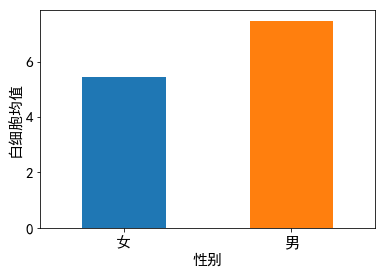

In [34]:

# mean.plot(kind='bar') #series.plot(kind='bar')
mean.plot.bar()
plt.xticks(rotation=0)
plt.ylabel("白细胞均值")

# 统计不同年龄段的白细胞计数，并画出柱状图，年龄段划分为：小于等于30，31至40，41至50以及大于50四个段。

In [35]:
data.head()

,序号,性别,身份证号,是否吸烟,是否饮酒,参加工作时间,体检年份,淋巴细胞计数,白细胞计数,血小板计数,工龄,出生年份,年龄
0,1,女,****1982080000,否,否,2009,2017,2.4,8.5,248.0,8,1982,35
1,2,女,****1984110000,否,否,2015,2017,1.8,5.8,300.0,2,1984,33
2,3,男,****1983060000,否,否,2013,2017,2.0,5.6,195.0,4,1983,34
3,4,男,****1985040000,否,否,2014,2017,2.5,6.6,252.0,3,1985,32
4,5,男,****1986040000,否,否,2014,2017,1.3,5.2,169.0,3,1986,31


In [37]:
data['年龄段'] = pd.cut(data.年龄, bins=[0,30,40,50, 100])
count = data.groupby('年龄段')['白细胞计数'].mean()
count


年龄段
(0, 30]      5.943176
(30, 40]     7.492611
(40, 50]     5.478235
(50, 100]    5.734107
Name: 白细胞计数, dtype: float64

Text(0, 0.5, '白细胞计数均值')

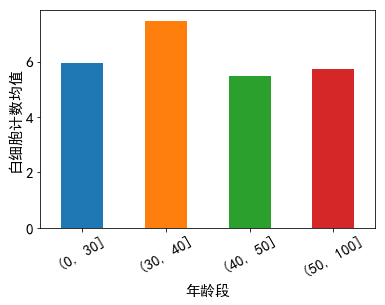

In [38]:
count.plot(kind = "bar")
plt.xticks(rotation=30)
plt.ylabel("白细胞计数均值")